In [ ]:
# Some liks
#

In [ ]:
import numpy as np              # numerical python
import pandas as pd             # dealing with dataframes (excel-like tables)
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns           # Advanced plots. Built on top of matplotlib.
import math
from google.colab import drive
import os

# Part 0: Load data and clean data

In [ ]:
# open google drive

gd = drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/2020_Exchange/MScCD/Mineria de datos/E900/Data2Analyse/080807_WearMillingY_50%/Level_002')
#os.chdir('/content/drive/Shared drive/2020_Exchange/MScCD/Mineria de datos/E900/Data2Analyse/080807_WearMillingY_50%/Level_002')

data_folders = os.listdir()
#print(data_folders)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
#data_str ='../E900/process/080807_WearMillingY_50%/Level_002/Trace_080807_101102R00R110R40R50R60.csv'
num_of_files = len(data_folders)
print('number of files:' +  str(num_of_files))


data_str = data_folders[0]
df = pd.read_csv(data_str)
print(df.shape)
df.head()

number of files:11
(6581, 8)


,time,+/Nck/!SD/nckServoDataActCurr32 [u1; 1],+/Nck/!SD/nckServoDataActCurr32 [u1; 2],+/Nck/!SD/nckServoDataActCurr32 [u1; 4],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4],+/Channel/!RP/rpa [u1; 15]
0,0.000,0.13202,-0.07947,1.80469,235.52499,-338.03159,128231.39844,1.0
1,0.002,0.13074,-0.07819,1.79443,235.52499,-338.03180,128256.68750,NaN
2,0.004,0.13202,-0.07947,1.83545,235.52499,-338.03201,128282.00000,NaN
3,0.006,0.13202,-0.07947,2.04053,235.52499,-338.03214,128307.27344,NaN
4,0.008,0.13202,-0.07819,1.84570,235.52499,-338.03226,128332.57031,1.0


In [ ]:
# Print info
df.info()

# mapping directory
map_dir = {'time' : 'time',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 1]': 'IqAx1',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 2]': 'IqAx2',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 3]': 'IqAx3',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 1]': 'posAx1',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 2]': 'posAx2',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 3]': 'posAx3',
           '+/Nck/!SD/nckServoDataActPower32 [u1; 6]': 'PowerSp',
           '+/Nck/!SD/nckServoDataActVelMot32 [u1; 6]':'VelMotSp',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 4]': 'IqAx4',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 1]': 'pos1stEncAx1',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2]': 'pos1stEncAx2',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3]': 'pos1stEncAx3',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4]': 'pos1stEncAx4',
           '+/Channel/!RP/rpa [u1; 15]': 'R5'}
df.rename(columns=map_dir, inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6581 entries, 0 to 6580
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   time                                          6581 non-null   float64
 1   +/Nck/!SD/nckServoDataActCurr32 [u1; 1]       6581 non-null   float64
 2   +/Nck/!SD/nckServoDataActCurr32 [u1; 2]       6581 non-null   float64
 3   +/Nck/!SD/nckServoDataActCurr32 [u1; 4]       6581 non-null   float64
 4   +/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2]  6581 non-null   float64
 5   +/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3]  6581 non-null   float64
 6   +/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4]  6581 non-null   float64
 7   +/Channel/!RP/rpa [u1; 15]                    1646 non-null   float64
dtypes: float64(8)
memory usage: 411.4 KB


,time,IqAx1,IqAx2,IqAx4,pos1stEncAx2,pos1stEncAx3,pos1stEncAx4,R5
0,0.000,0.13202,-0.07947,1.80469,235.52499,-338.03159,128231.39844,1.0
1,0.002,0.13074,-0.07819,1.79443,235.52499,-338.03180,128256.68750,NaN
2,0.004,0.13202,-0.07947,1.83545,235.52499,-338.03201,128282.00000,NaN
3,0.006,0.13202,-0.07947,2.04053,235.52499,-338.03214,128307.27344,NaN
4,0.008,0.13202,-0.07819,1.84570,235.52499,-338.03226,128332.57031,1.0


In [ ]:
label = 'IqAx4'
iq =df[label]
iq.size

6581

# 1 Part: some Scoping

## Do some scales:
# 1. Standard scaler (with moving average value and standard deviation)

In [ ]:
def moving_standard_scaler(time_series, num):
    """
    Optional docstring explaining the function.
    """
    # Function body
    # Your code here
    N = time_series.size
    maf_signal =  [0] * N
    maf_sima =  [0] * N
    mStdScOut =  [0] * N

    # standard scalar for 1st n values
    for k1 in range(0,num-1):
        maf_signal[k1] = sum(time_series[0:k1+1]) / len(maf_signal[0:k1+1])
        variance = sum((x - maf_signal[k1]) ** 2 for x in time_series[0:k1+1]) / time_series[0:k1+1].size
        maf_sima[k1]= math.sqrt(variance)
        maf_sima[0]=1
        mStdScOut[k1] = (time_series[k1] - maf_signal[k1])/maf_sima[k1]
    # standard scalar for values between n+1 and N
    for k2 in range(num,N-1):
        maf_signal[k2] = sum(time_series[k2-num:k2+1]) / len(maf_signal[k2-num:k2+1])
        variance = sum((x - maf_signal[k2]) ** 2 for x in time_series[k2-num:k2+1]) / len(time_series[k2-num:k2+1])
        maf_sima[k2]= math.sqrt(variance)
        mStdScOut[k2] = (time_series[k2] - maf_signal[k2])/maf_sima[k2]
    return mStdScOut  # Optional


In [ ]:
#
from scipy.signal import butter, lfilter, freqz
# Design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter to the data
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:

iq =moving_standard_scaler(df[label], 12)

# Sample rate and desired cutoff frequency (in Hz)
fs = 500.0
cutoff = 120.0
 # Apply the low-pass filter
iq_filt = lowpass_filter(iq, cutoff, fs)


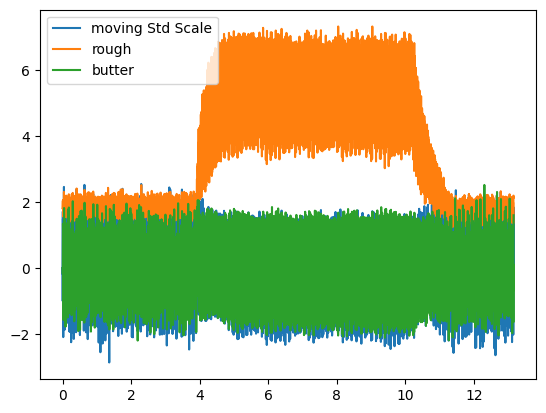

In [ ]:
# time series plot before and after scaling

plt.plot(df['time'], iq, label = 'moving Std Scale')
plt.plot(df['time'], df[label], label = 'rough')
plt.plot(df['time'], iq_filt, label = 'butter')
plt.legend(loc = 2)
plt.show()

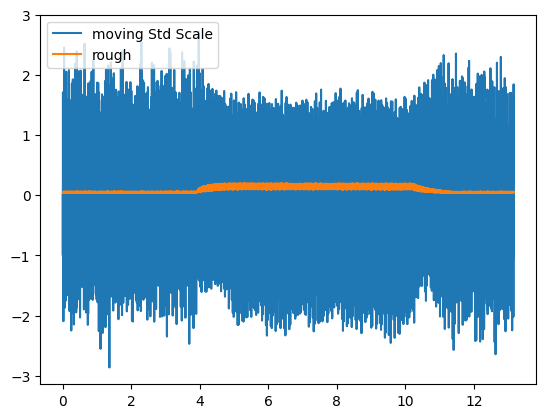

In [ ]:
# time series plot before and after scaling

plt.plot(df['time'], iq, label = 'moving Std Scale')
plt.plot(df['time'], df[label]/36, label = 'rough')
plt.legend(loc = 2)
plt.show()

## 2. Fast Fourier Transformation (FFT)

6581
1387
35.12637390467507
6322.747302841513


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


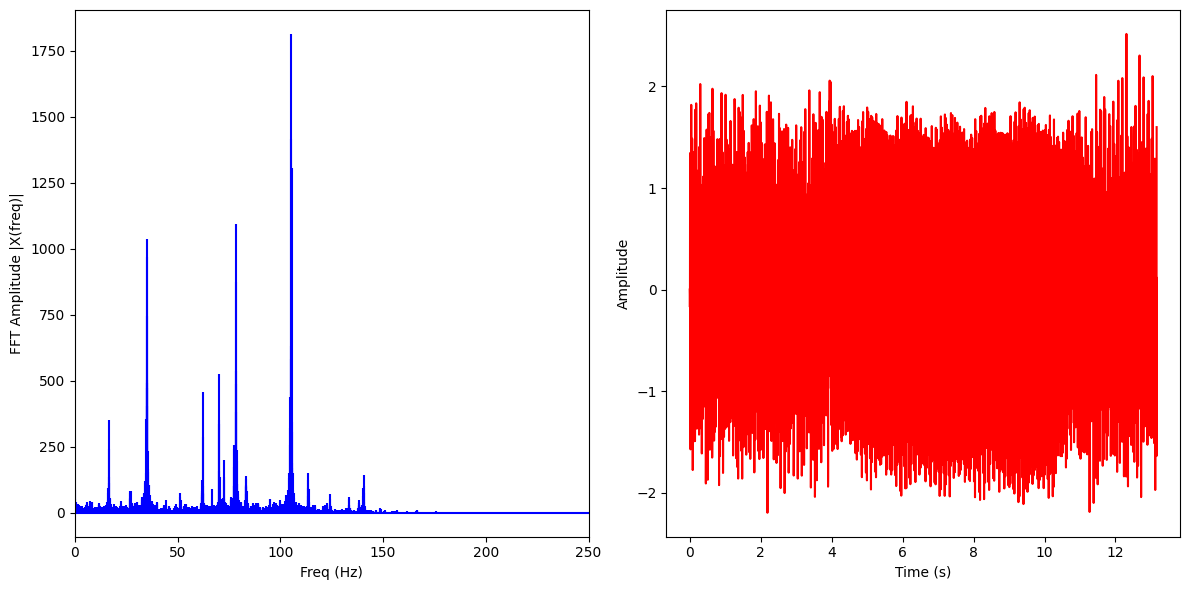

35.14666666666667


In [ ]:
# fft of ActVelMot32
from numpy.fft import fft, ifft
sr = 500
t = df['time']
#X = fft(iq) #df[label] test_iq)
#N = len(X)
X = fft(y) #df[label] test_iq)
N = len(X)

print(N)
n = np.arange(N)
T = N/sr
freq = n/T


idx_max_freq_amp = X[0:4000].argmax()
print(idx_max_freq_amp)
xfreq = freq[idx_max_freq_amp]
print(xfreq/3)
print(xfreq*60)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,500/2)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
print(2108.8/60)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


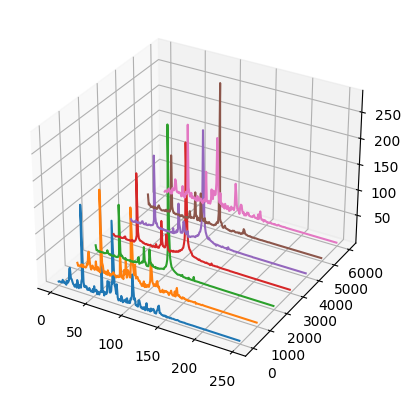

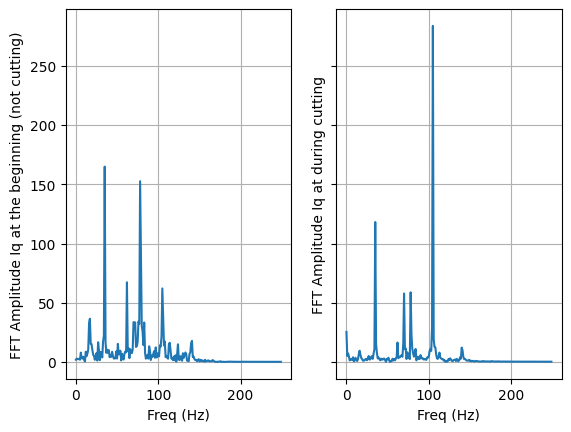

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# FFT over time window
from numpy.fft import fft, ifft
data_len = len(iq)
wind_len = 500
t = df['time']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
counter = 999
counter_lim = 1000
for idx in range(0, data_len-wind_len):
  counter = counter + 1
  sr = 500
  t = df['time']
  #X = fft(iq) #df[label] test_iq)
  #N = len(X)
  X = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
  N = len(X)
  n = np.arange(N)
  T = N/sr
  freq = n/T
  idx_end = int(np.floor(N/2))
  if(abs(counter - counter_lim) <= 1e-15):
    ax.plot(freq[0:idx_end],idx*np.ones_like(X[0:idx_end]) , np.abs(X[0:idx_end]) )
    counter = 0
plt.show()
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('run number')
ax.set_zlabel('FFT Amplitude Iq')


##
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
idx = 0
X0 = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T
idx_end = int(np.floor(N/2))
ax1.plot(freq[0:idx_end], np.abs(X0[0:idx_end]))
ax1.set_xlabel('Freq (Hz)')
ax1.set_ylabel('FFT Amplitude Iq at the beginning (not cutting)')




idx = 5000
X = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T
idx_end = int(np.floor(N/2))
ax2.plot(freq[0:idx_end], np.abs(X[0:idx_end]))
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('FFT Amplitude Iq at during cutting')
ax1.grid(True)
ax2.grid(True)


In [ ]:
noc = 3
amp_max_nl = max(np.abs(X0))
amp_max_nl
freq_dom = freq[np.abs(X0)==amp_max_nl]
freq_of_interest = freq_dom[0]*1*noc

In [ ]:
amp_at_cut = []
amp_at_rot = []
nor = range(0, data_len-wind_len)
for idx in range(0, data_len-wind_len):
  counter = counter + 1
  sr = 500
  t = df['time']
  #X = fft(iq) #df[label] test_iq)
  #N = len(X)
  X = fft(iq_filt[idx:idx+wind_len]) #df[label] test_iq)
  N = len(X)
  n = np.arange(N)
  T = N/sr
  freq = n/T
  idx_end = int(np.floor(N/2))
  amp_at_cut.append(np.abs(X[int(freq_of_interest)]))
  amp_at_rot.append(np.abs(X[int(freq_dom[0])]))


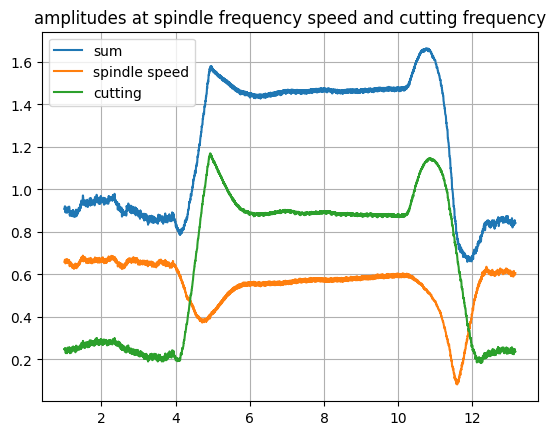

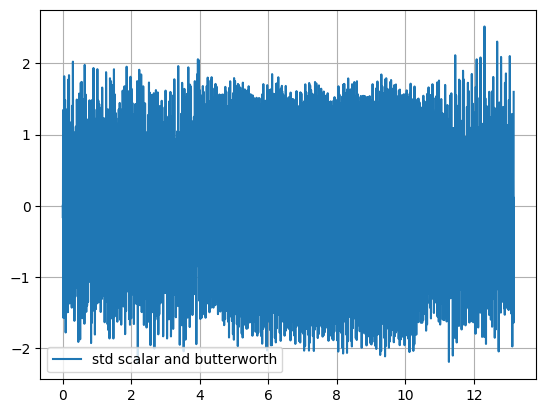

6081
6581


In [ ]:
plt.plot(t[wind_len:len(t)], 2*(np.array(amp_at_cut + np.array(amp_at_rot)))/wind_len, label = 'sum')
plt.plot(t[wind_len:len(t)], 2*(np.array(np.array(amp_at_rot)))/wind_len, label = 'spindle freq')
plt.plot(t[wind_len:len(t)], 2*(np.array(amp_at_cut ))/wind_len, label = 'cutting freq')
plt.legend(loc = 2)
plt.grid(True)
plt.title('amplitudes at spindle frequency speed and cutting frequency')
plt.show()
plt.plot(t, iq_filt, label='std scalar and butterworth')
plt.legend(loc = 3)
plt.grid(True)
plt.show()
print(len(nor))
print(len(t))

## 3. Gibbs Sampler - JAGS (MCMC)

In [1]:
# JAGS model code
code = '''
model {
# Likelihood
    for (i in 1:k) {
        # Model equation
        Mc[i] ~ dnorm(pred[i], tau)
        #pred[i] <- ap * fz^(1 - mc) * sin(kappa)^(mc) * kc11 * rtool
        log(pred[i]) <- log(ap) + (1 - mc)* log(fz) + (1-mc)*log(sin(kappa)) +log(kc11) +log( rtool)
    }

    # Priors
    kc11 ~ dnorm(m_kc, tau_kc)  # Normal prior with mean 1200 and precision 1/50^2
    mc ~ dbeta(alpha_mc, beta_mc)      # Uniform prior between 0 and 1

    # Precision for the normal distribution (tau = 1/variance)
    tau ~ dgamma(0.1, 0.1) # Gamma prior for precision
}
'''